In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.columns.value_counts().sum()

26

In [9]:
df["classification"].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [10]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [12]:
df_object = df.select_dtypes(include=['object']).copy()
df_object.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
df["pcv"] = pd.to_numeric(df["pcv"], errors='coerce')
df["wc"] = pd.to_numeric(df["wc"], errors='coerce')
df["rc"] = pd.to_numeric(df["rc"], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [17]:
df.drop(['id'], axis=1, inplace=True)

In [18]:
df.isnull().sum().sort_values()

classification      0
pe                  1
appet               1
ane                 1
cad                 2
dm                  2
htn                 2
pcc                 4
ba                  4
age                 9
bp                 12
sc                 17
bu                 19
bgr                44
al                 46
sg                 47
su                 49
hemo               52
pc                 65
pcv                71
sod                87
pot                88
wc                106
rc                131
rbc               152
dtype: int64

In [21]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [22]:
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [23]:
num_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [25]:
for col in cat_cols:
  print(f"{col} has [{df[col].unique()}] unique values")  

rbc has [[nan 'normal' 'abnormal']] unique values
pc has [['normal' 'abnormal' nan]] unique values
pcc has [['notpresent' 'present' nan]] unique values
ba has [['notpresent' 'present' nan]] unique values
htn has [['yes' 'no' nan]] unique values
dm has [['yes' 'no' ' yes' '\tno' '\tyes' nan]] unique values
cad has [['no' 'yes' '\tno' nan]] unique values
appet has [['good' 'poor' nan]] unique values
pe has [['no' 'yes' nan]] unique values
ane has [['no' 'yes' nan]] unique values
classification has [['ckd' 'ckd\t' 'notckd']] unique values


In [26]:
df['dm'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
df['cad'] = df['cad'].replace(to_replace = '\tno', value = 'no')
df['classification'] = df['classification'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

C:\Users\HEMANTA GHOSH\AppData\Local\Temp\ipykernel_20268\2696978115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)


In [27]:
for col in cat_cols:
  print(f"{col} has [{df[col].unique()}] unique values")  

rbc has [[nan 'normal' 'abnormal']] unique values
pc has [['normal' 'abnormal' nan]] unique values
pcc has [['notpresent' 'present' nan]] unique values
ba has [['notpresent' 'present' nan]] unique values
htn has [['yes' 'no' nan]] unique values
dm has [['yes' 'no' nan]] unique values
cad has [['no' 'yes' nan]] unique values
appet has [['good' 'poor' nan]] unique values
pe has [['no' 'yes' nan]] unique values
ane has [['no' 'yes' nan]] unique values
classification has [['ckd' 'not ckd']] unique values


In [28]:
df['classification'] = df['classification'].map({'ckd':0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors = 'coerce')

In [30]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

C:\Users\HEMANTA GHOSH\AppData\Local\Temp\ipykernel_20268\1263306962.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\HEMANTA GHOSH\AppData\Local\Temp\ipykernel_20268\1263306962.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\HEMANTA GHOSH\AppData

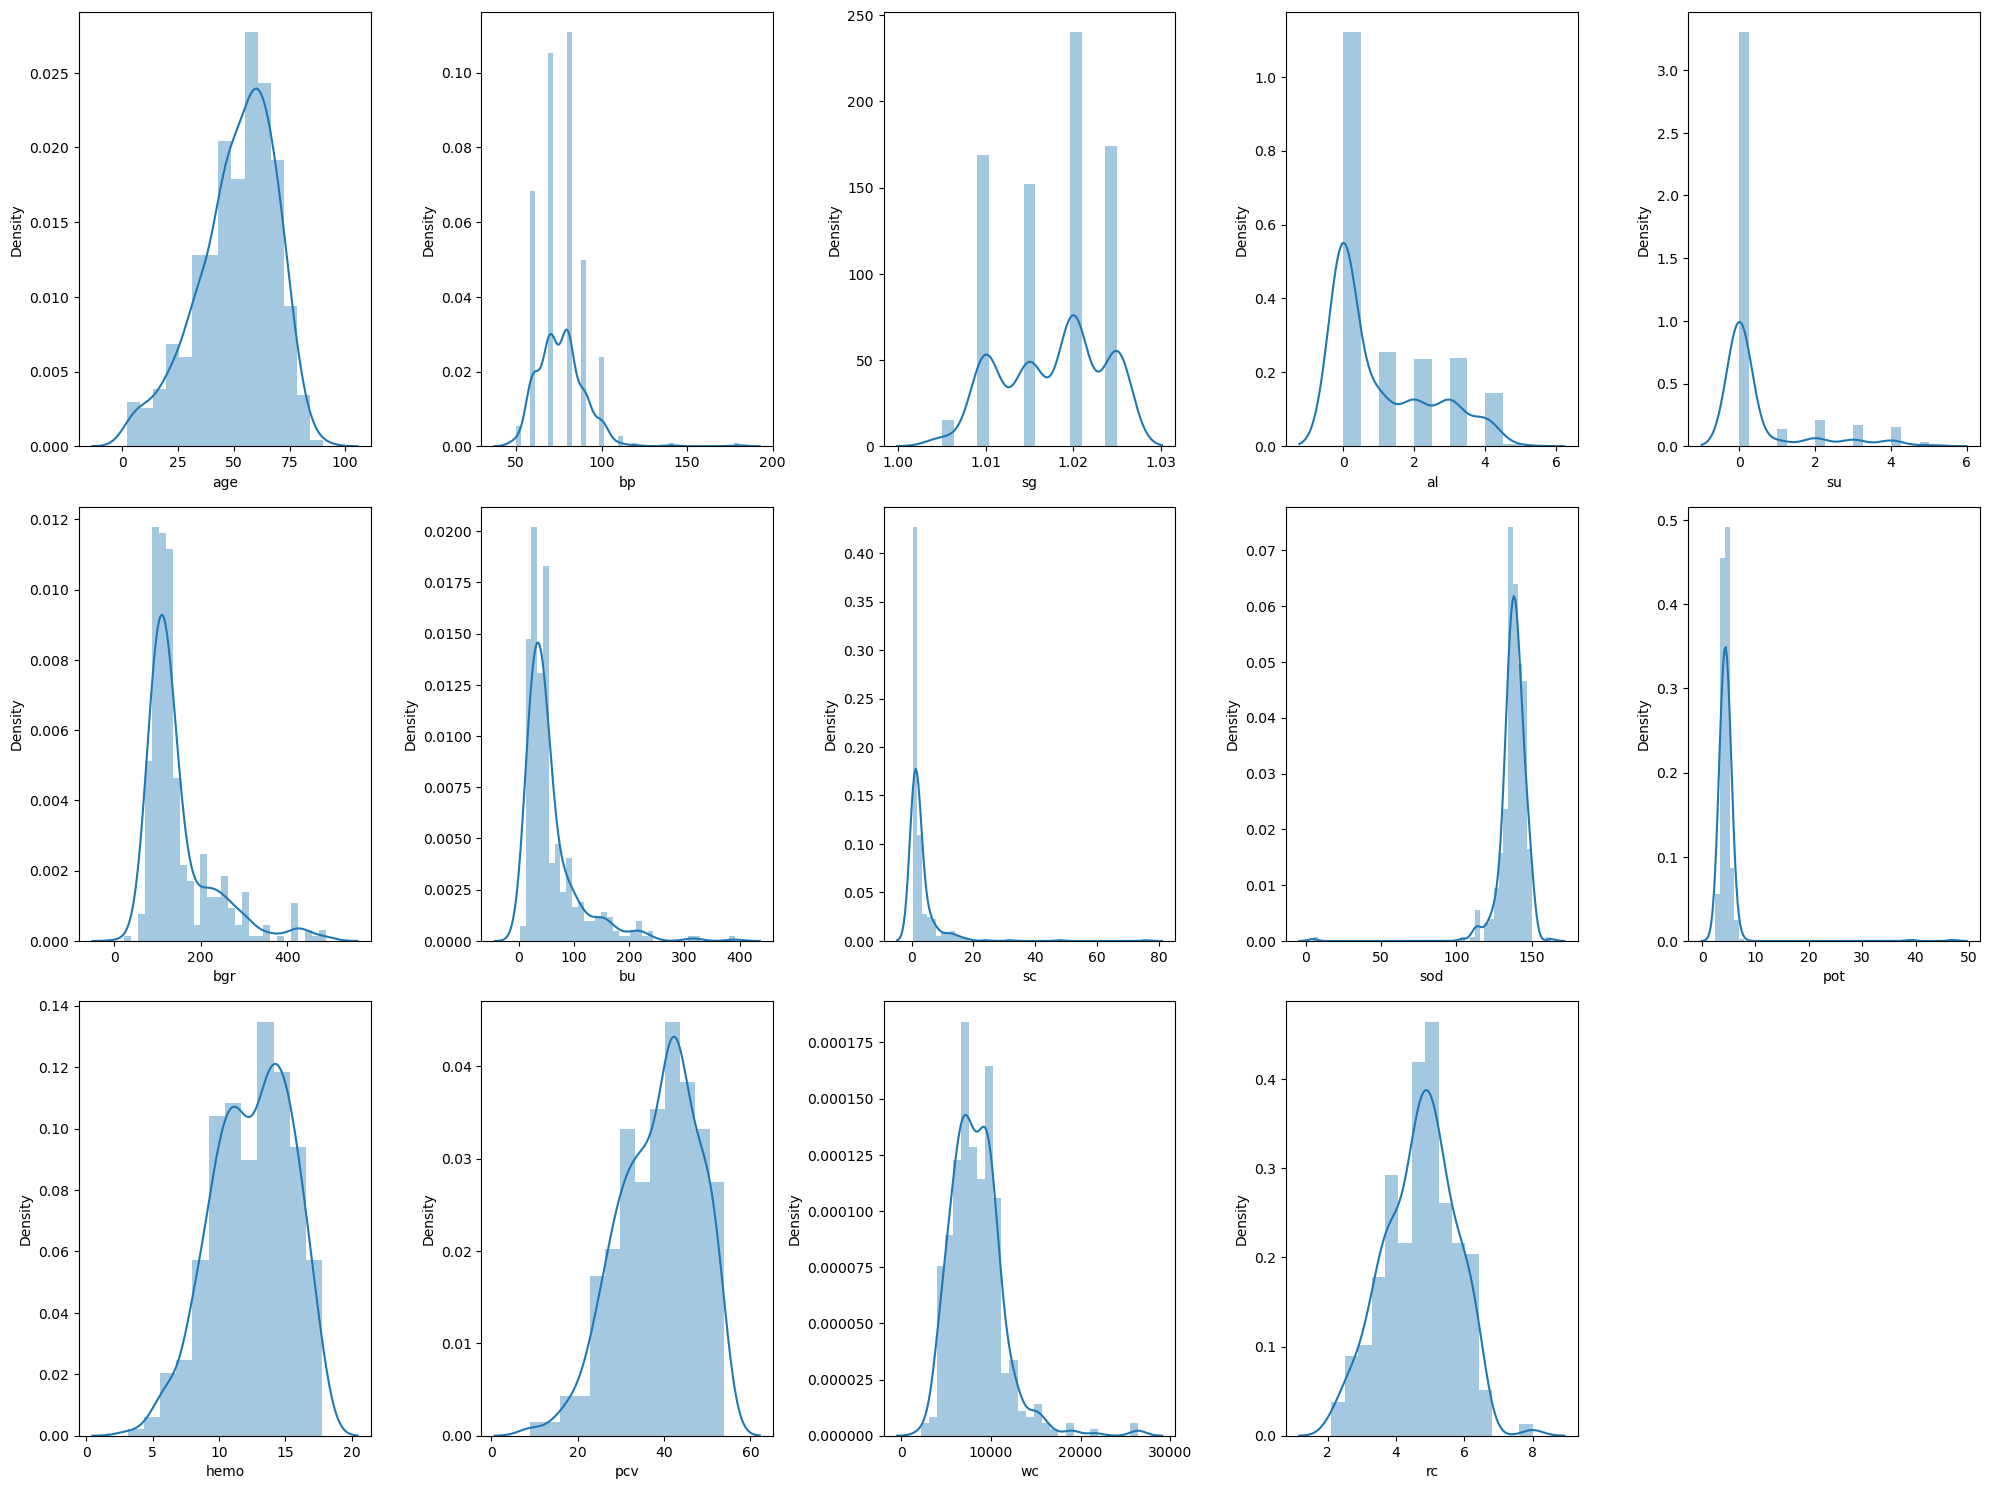

In [47]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [31]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

# impute mode for categorical value
random_sampling('rbc')
random_sampling('pc')
for col in cat_cols:
    impute_mode(col)

In [32]:
df[num_cols].isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [33]:
df[cat_cols].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [34]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
# Dummy Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [36]:
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_1
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,141.0,4.0,...,True,False,False,True,True,False,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,124.0,18.0,0.8,144.0,3.5,...,True,False,False,False,False,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,4.6,...,True,False,False,False,True,False,True,False,True,False
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,False,True,False,True,False,False,True,True,True,False
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,130.0,3.5,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,True,False,False,False,False,False,False,False,False,True
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,True,False,False,False,False,False,False,False,False,True
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,True,False,False,False,False,False,False,False,False,True
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,True,False,False,False,False,False,False,False,False,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               400 non-null    float64
 1   bp                400 non-null    float64
 2   sg                400 non-null    float64
 3   al                400 non-null    float64
 4   su                400 non-null    float64
 5   bgr               400 non-null    float64
 6   bu                400 non-null    float64
 7   sc                400 non-null    float64
 8   sod               400 non-null    float64
 9   pot               400 non-null    float64
 10  hemo              400 non-null    float64
 11  pcv               400 non-null    float64
 12  wc                400 non-null    float64
 13  rc                400 non-null    float64
 14  rbc_normal        400 non-null    bool   
 15  pc_normal         400 non-null    bool   
 16  pcc_present       400 non-null    bool   
 1

In [45]:
df.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_1
age,1.000000,0.169656,-0.173225,0.123945,0.219367,0.151147,0.199544,0.130937,-0.074768,0.058094,...,-0.118297,0.160490,0.045196,0.387314,0.360062,0.233375,0.146987,0.087585,0.051804,-0.216094
bp,0.169656,1.000000,-0.189634,0.137922,0.184539,0.124875,0.174238,0.141105,-0.096454,0.073961,...,-0.140494,0.060961,0.112033,0.270238,0.225930,0.087325,0.179844,0.049150,0.182984,-0.277947
sg,-0.173225,-0.189634,1.000000,-0.397708,-0.284258,-0.289127,-0.248362,-0.176662,0.208539,-0.054391,...,0.313645,-0.286661,-0.217111,-0.322267,-0.368317,-0.108199,-0.227513,-0.216582,-0.217442,0.642421
al,0.123945,0.137922,-0.397708,1.000000,0.223212,0.299229,0.373462,0.262828,-0.291817,0.084033,...,-0.461735,0.371503,0.342301,0.470240,0.374123,0.238295,0.286657,0.422214,0.265143,-0.572439
su,0.219367,0.184539,-0.284258,0.223212,1.000000,0.552067,0.124497,0.153405,-0.031906,0.173808,...,-0.211555,0.140164,0.099673,0.293055,0.424996,0.240854,0.105308,0.083610,0.036310,-0.301876
bgr,0.151147,0.124875,-0.289127,0.299229,0.552067,1.000000,0.097119,0.041405,-0.113445,0.056112,...,-0.271222,0.206431,0.085304,0.330494,0.441236,0.185770,0.168268,0.093579,0.121197,-0.387514
bu,0.199544,0.174238,-0.248362,0.373462,0.124497,0.097119,1.000000,0.566342,-0.269858,0.325565,...,-0.319557,0.184166,0.157707,0.384456,0.311214,0.217266,0.273462,0.321766,0.427398,-0.352402
sc,0.130937,0.141105,-0.176662,0.262828,0.153405,0.041405,0.566342,1.000000,-0.579345,0.196267,...,-0.188124,0.053021,0.052935,0.278927,0.213608,0.194402,0.158112,0.176971,0.233198,-0.295106
sod,-0.074768,-0.096454,0.208539,-0.291817,-0.031906,-0.113445,-0.269858,-0.579345,1.000000,0.069932,...,0.146227,-0.110921,-0.053006,-0.279348,-0.240849,-0.225066,-0.105088,-0.152822,-0.190577,0.308315
pot,0.058094,0.073961,-0.054391,0.084033,0.173808,0.056112,0.325565,0.196267,0.069932,1.000000,...,-0.136293,-0.012218,0.001577,0.048371,0.062555,-0.001421,-0.030051,0.054491,0.105734,-0.060686


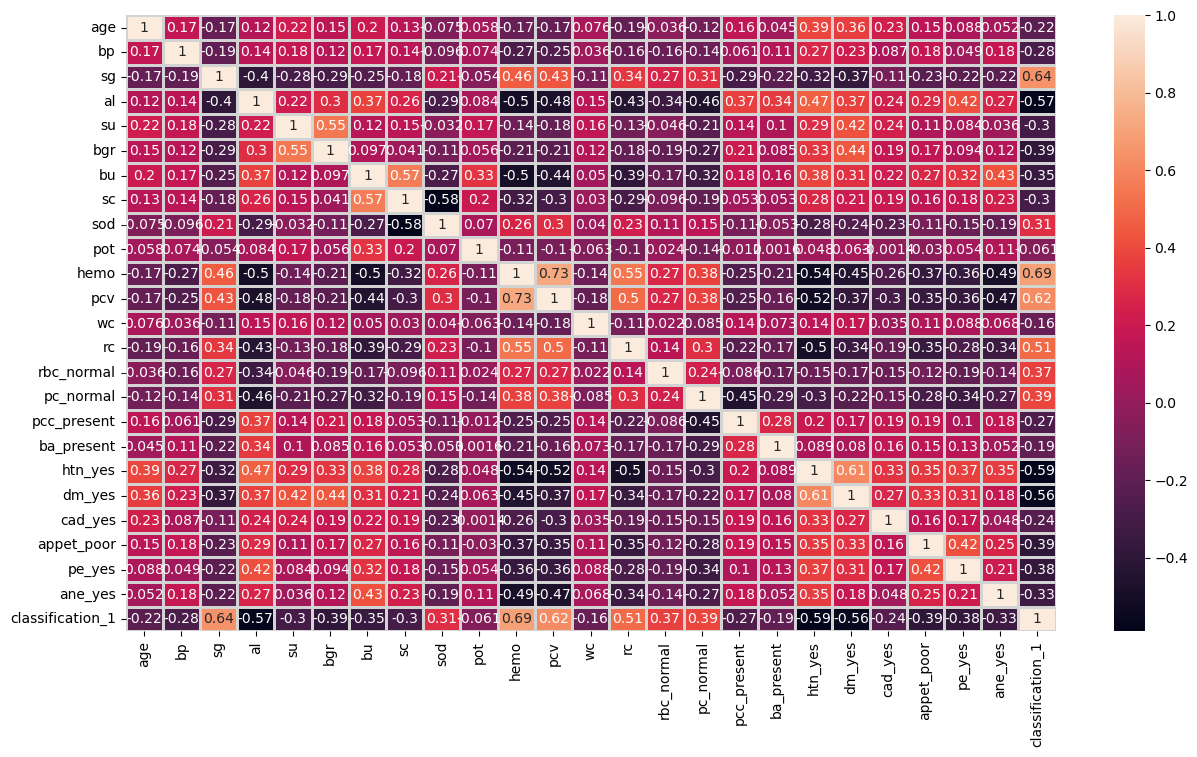

In [46]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

In [39]:
# spliting the data into input and output variables
X = df.drop('classification_1', axis=1)
y = df['classification_1']

In [40]:
X

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,141.0,4.0,...,False,True,False,False,True,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,124.0,18.0,0.8,144.0,3.5,...,True,True,False,False,False,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,135.0,4.6,...,True,True,False,False,False,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,True,False,True,False,True,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,130.0,3.5,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,True,True,False,False,False,False,False,False,False,False
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,True,True,False,False,False,False,False,False,False,False
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,True,True,False,False,False,False,False,False,False,False
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,True,True,False,False,False,False,False,False,False,False


In [41]:
y

0      False
1      False
2      False
3      False
4      False
       ...  
395     True
396     True
397     True
398     True
399     True
Name: classification_1, Length: 400, dtype: bool

In [42]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 97.50%
Confusion Matrix:
[[50  2]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        52
        True       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [55]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy: {accuracy_dtc*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtc))
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))

Accuracy: 96.25%
Confusion Matrix:
[[51  1]
 [ 2 26]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97        52
        True       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [56]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 98.75%
Confusion Matrix:
[[52  0]
 [ 1 27]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99        52
        True       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [58]:
# Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Accuracy: 97.50%
Confusion Matrix:
[[51  1]
 [ 1 27]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98        52
        True       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [59]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)  
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 98.75%
Confusion Matrix:
[[52  0]
 [ 1 27]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99        52
        True       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [60]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 97.50%
Confusion Matrix:
[[51  1]
 [ 1 27]]
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.98      0.98        52
        True       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [63]:
models = pd.DataFrame({
    "Models" : ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'SVM'],
    "Accuracy" : [accuracy_knn, accuracy_dtc, accuracy_rf, accuracy_nb, accuracy_lr, accuracy_svm]
})

In [65]:
models.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy
2,Random Forest,0.9875
4,Logistic Regression,0.9875
0,KNN,0.9750
3,Naive Bayes,0.9750
5,SVM,0.9750
1,Decision Tree,0.9625


In [66]:
import pickle
model = dtc
pickle.dump(model, open("kindey.pkl", 'wb'))

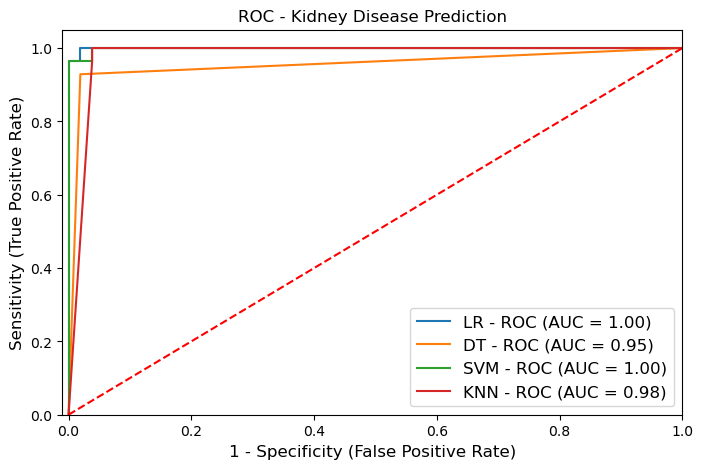

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))

models = [
    {'label': 'LR', 'model': lr},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svm},
    {'label': 'KNN', 'model': knn},
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
    auc = metrics.roc_auc_score(y_test, y_score)

    plt.plot(fpr, tpr, label=f"{m['label']} - ROC (AUC = {auc:.2f})")


plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()
